二分类实现辨别是否是鸢尾花

尽管名为逻辑回归，但实际上是一个分类模型，尤其是在我们只有两个类时。逻辑回归的名称来源于将输入的任意实值x转换成值在0到1
采用sigmoid,划为[0,1]之间的数据 ,可以解释为概率

为了简单起见，我们将重点关注前两个特征：花萼长度——我们将其称为特征f1，花萼的宽度——我们将其称为特征f2。使用在线性回归中学习的技巧，我们可以把输入x表示成两个特征f1和f2的一个线性组合：
x = w1f1 + w2f2

第一步加载数据集

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn
%matplotlib inline
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
plt.style.use('ggplot')


iris = sklearn.datasets.load_iris()

iris 数据集分析：
directory
dir() 函数不带参数时，返回当前范围内的变量、方法和定义的类型列表；带参数时，返回参数的属性、方法列表。如果参数包含方法__dir__()，该方法将被调用。如果参数不包含__dir__()，该方法将最大限度地收集参数信息.

dir(iris)   dir()   #  获得当前模块的属性列表dir()
所有的数据点都包含在'data'中。有150个数据点，每个数据点有4个特征值：

In [16]:
dir(iris),iris.feature_names

(['DESCR',
  'data',
  'feature_names',
  'filename',
  'frame',
  'target',
  'target_names'],
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [54]:
np.unique(iris.target) #读取非重复元素  array([0, 1, 2])


numpy.ndarray

由于其内由三个数据为了让其 成为一个二分类的问题,
子轩需要将一些数据丢弃掉啊-_-!!



In [63]:
idx = iris.target !=2 #此时 数据中只留下了 bool类型
data = iris.data[idx].astype(np.float32) #传入bool类型，统计学习方法，筛选数据，还可以使用 x  for x in Y if x<2 ?
target1 = list(filter(lambda x: x < 2,iris.target))
target = iris.target[idx].astype(np.float32)
target1 = np.array(target1)
np.unique(target1)

array([0, 1])

#生成器和迭代器
dict_list = {}
list0 = [x for x in range(5) if x]
list1 = [x for x in range(5,10)]

lambda高阶用法
  fun1 = lambda x: x ** 2
  iterable = filter(lambda x: x % 2, range(1, 10))
  items1 = list(map(fun, iterable))
  items2 = [x ** 2 for x in range(1, 10) if x % 2]

  func = lambda x,y: x*10+y
  func(1,2)

filter()
    filter（fun，sequence)

    is_odd = lambda x : x%2 == 1
    newList = filter(is_odd,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    序列的每个元素作为参数传递给函数进行判断，
    然后返回 True 或 False，最后将返回 True 的元素放到新列表中

map()
    map(fun，sequence)
    function -- 函数
    iterable -- 一个或多个序列
    第一个参数 function 以参数序列中的每一个元素调用 function 函数，
    返回包含每次 function 函数返回值的新列表,返回迭代器
    map(lambda x:x**2, [1,2,3,4,5])




map()和filter()都是对调用他们的数组进行遍历


参数上map函数与filter是一样的，他们的差别就是函数是对每个元素做一个数学上的代换，而非条件的判断

In [41]:
'''搞懂三个函数  map， lambda， filter'''
ls = [1,2,3,4,5]
map1 = list(map(lambda x:x**2,ls ))
filter1 = list(filter(lambda x: x<3,ls) )#迭代对象 ，可以进行迭代，也可以实例化
filter1

[1, 2]

In [52]:
map2 = np.array(ls)<3
map2

array([ True,  True, False, False, False])

创建散点图,plt.scatter() ,检查数据,
x,y
c对应颜色指示值，也就是如果采用了渐变色的话，我们设置c=x就能使得点的颜色根据点的x值变化
cmap调整渐变色或者颜色列表的种类
s控制点大小

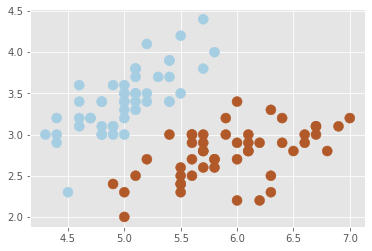

In [15]:
plt.scatter(data[:,0],data[:,1],c =target,cmap='Paired',s = 100)